# Predicting the Top 10 RBs of 2025

In [102]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
# Loading in the 2022-2024 datasets
df_2022 = pd.read_csv("/content/Top 25 RBs 2022.csv")
df_2023 = pd.read_csv("/content/Top 25 RBs 2023.csv")
df_2024 = pd.read_csv("/content/Top 25 RB 2024.csv")

In [3]:
df_2022.head()

,Player,Rush Yds,Att,TD,20+,40+,Lng,Rush 1st,Rush 1st%,Rush FUM
0,Josh Jacobs,1653,340,12,7,2,86,93,27.4,2
1,Derrick Henry,1538,349,13,10,4,56,65,18.6,4
2,Nick Chubb,1525,302,12,13,1,41,69,22.8,1
3,Saquon Barkley,1312,295,10,9,2,68,62,21.0,1
4,Miles Sanders,1269,259,11,9,1,40,62,23.9,1


In [45]:
# Standardize player names
for df in [df_2022, df_2023, df_2024]:
    df['Player'] = df['Player'].str.strip().str.lower()

In [46]:
# Merge using an outer join to retain all players
merged_df = df_2022.merge(df_2023, on='Player', how='outer').merge(df_2024, on='Player', how='outer')

In [47]:
# Fill missing values to prevent data loss
merged_df.fillna(0, inplace=True)

In [48]:
# Display results
print(f"Total players in merged dataset: {len(merged_df)}")
print(merged_df.head())

Total players in merged dataset: 46
           Player  Rush Yds 2022  Rush TDs 2022  Rush Yds 2023  Rush TDs 2023  \
0     aaron jones         1121.0            2.0            0.0            0.0   
1    alvin kamara          897.0            2.0            0.0            0.0   
2   austin ekeler          915.0           13.0            0.0            0.0   
3  bijan robinson            0.0            0.0          976.0            4.0   
4     breece hall            0.0            0.0          994.0            5.0   

   Rush Yds 2024  Rush TDs 2024  
0         1138.0            5.0  
1          950.0            6.0  
2            0.0            0.0  
3         1456.0           14.0  
4          876.0            5.0  


In [49]:
# Viewing new 2022 dataset
df_2022.head(10)

,Player,Rush Yds 2022,Rush TDs 2022
0,josh jacobs,1653,12
1,derrick henry,1538,13
2,nick chubb,1525,12
3,saquon barkley,1312,10
4,miles sanders,1269,11
5,dalvin cook,1173,8
6,justin fields,1143,8
7,christian mccaffrey,1139,8
8,travis etienne,1125,5
9,aaron jones,1121,2


In [50]:
merged_df.head(10)

,Player,Rush Yds 2022,Rush TDs 2022,Rush Yds 2023,Rush TDs 2023,Rush Yds 2024,Rush TDs 2024
0,aaron jones,1121.0,2.0,0.0,0.0,1138.0,5.0
1,alvin kamara,897.0,2.0,0.0,0.0,950.0,6.0
2,austin ekeler,915.0,13.0,0.0,0.0,0.0,0.0
3,bijan robinson,0.0,0.0,976.0,4.0,1456.0,14.0
4,breece hall,0.0,0.0,994.0,5.0,876.0,5.0
5,bucky irving,0.0,0.0,0.0,0.0,1122.0,8.0
6,chase brown,0.0,0.0,0.0,0.0,990.0,7.0
7,christian mccaffrey,1139.0,8.0,1459.0,14.0,0.0,0.0
8,chuba hubbard,0.0,0.0,902.0,5.0,1195.0,10.0
9,d'andre swift,0.0,0.0,1049.0,5.0,959.0,6.0


In [51]:
# Computing average 'Rush Yds' and 'Rush TDs'
merged_df['Avg Rush Yds'] = merged_df[['Rush Yds 2022',
                                       'Rush Yds 2023',
                                       'Rush Yds 2024']].mean(axis=1)

merged_df['Avg Rush TDs'] = merged_df[['Rush TDs 2022',
                                       'Rush TDs 2023',
                                       'Rush TDs 2024']].mean(axis=1)

In [52]:
# Viewing columns for averaged stats
merged_df.head(10)

,Player,Rush Yds 2022,Rush TDs 2022,Rush Yds 2023,Rush TDs 2023,Rush Yds 2024,Rush TDs 2024,Avg Rush Yds,Avg Rush TDs
0,aaron jones,1121.0,2.0,0.0,0.0,1138.0,5.0,753.000000,2.333333
1,alvin kamara,897.0,2.0,0.0,0.0,950.0,6.0,615.666667,2.666667
2,austin ekeler,915.0,13.0,0.0,0.0,0.0,0.0,305.000000,4.333333
3,bijan robinson,0.0,0.0,976.0,4.0,1456.0,14.0,810.666667,6.000000
4,breece hall,0.0,0.0,994.0,5.0,876.0,5.0,623.333333,3.333333
5,bucky irving,0.0,0.0,0.0,0.0,1122.0,8.0,374.000000,2.666667
6,chase brown,0.0,0.0,0.0,0.0,990.0,7.0,330.000000,2.333333
7,christian mccaffrey,1139.0,8.0,1459.0,14.0,0.0,0.0,866.000000,7.333333
8,chuba hubbard,0.0,0.0,902.0,5.0,1195.0,10.0,699.000000,5.000000
9,d'andre swift,0.0,0.0,1049.0,5.0,959.0,6.0,669.333333,3.666667


In [53]:
# Assigning features (X) and target (y)
features = ['Avg Rush Yds', 'Avg Rush TDs']
target_yds = ['Rush Yds 2024']
target_tds = ['Rush TDs 2024']

X = merged_df[features]
y_tds = merged_df[target_tds]
y_yds = merged_df[target_yds]

In [54]:
# Split into training (2022-2023) and test (2024)
X_train, X_test, y_train_yds, y_test_yds = train_test_split(X, y_yds, test_size=0.2, random_state=42)
X_train, X_test, y_train_tds, y_test_tds = train_test_split(X, y_tds, test_size=0.2, random_state=42)

In [134]:
# Initilize Random Forest Model
rf_yards = RandomForestRegressor(n_estimators=100, random_state=42)
rf_tds = RandomForestRegressor(n_estimators=100, random_state=42)

In [137]:
# Training the model
rf_yards.fit(X_train, y_train_yds.values.reshape(-1,))
rf_tds.fit(X_train, y_train_tds.values.reshape(-1,))

RandomForestRegressor(random_state=42)

In [138]:
# Predicting on 2024 test data
y_pred_yds = rf_yards.predict(X_test)
y_pred_tds = rf_tds.predict(X_test)

In [139]:
# Evaluating the model
print("MAE for Rushing Yards:", mean_absolute_error(y_test_yds, y_pred_yds))
print("MAE for Rushing Tds:", mean_absolute_error(y_test_tds, y_pred_tds))

MAE for Rushing Yards: 346.36899999999997
MAE for Rushing Tds: 2.19


In [59]:
# Predicting stats for 2025
merged_df['Predicted Rushing Yards 2025'] = rf_yards.predict(X)
merged_df['Predicted Rushing TDs 2025'] = rf_tds.predict(X)

In [83]:
# Capitalize first letter of first and last names
merged_df['Player'] = merged_df['Player'].str.title()

In [84]:
# Predicting stats for Top 10 RBs 2025 by rushing yards
top_10 = merged_df.sort_values(by='Predicted Rushing Yards 2025', ascending=False).head(10)

In [85]:
# Displaying Top 10 RB stats for 2025
print(top_10[['Player', 'Predicted Rushing Yards 2025', 'Predicted Rushing TDs 2025']])

             Player  Predicted Rushing Yards 2025  Predicted Rushing TDs 2025
15    Derrick Henry                       1883.07                       15.23
42   Saquon Barkley                       1808.49                       13.43
21     Jahmyr Gibbs                       1339.54                       14.58
33   Kyren Williams                       1277.65                       13.78
29  Jonathan Taylor                       1277.38                        9.23
30      Josh Jacobs                       1200.53                       13.87
0       Aaron Jones                       1167.87                        6.11
3    Bijan Robinson                       1156.78                        9.75
23     James Conner                       1082.98                        8.68
43     Tony Pollard                       1079.64                        5.78


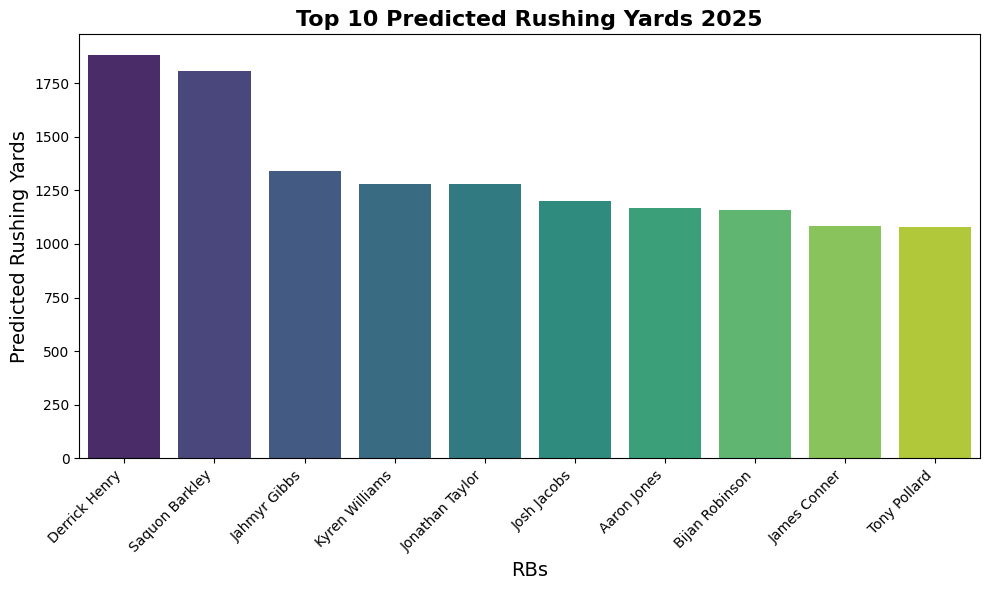

In [126]:
# Plotting the Predicted 2025 Rush Yards
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Predicted Rushing Yards 2025', data=top_10, hue='Player', palette='viridis', legend=False)

# Adding labels
plt.title('Top 10 Predicted Rushing Yards 2025', fontsize=16, weight='bold')
plt.xlabel('RBs', fontsize=14)
plt.ylabel('Predicted Rushing Yards', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The top 5 RBs with the highest predicted rushing yards from this list:

1. Derrick Henry
2. Saquon Barkley
3. Jahmyr Gibbs
4. Kyren Williams
5. Jonathan Taylor



In [122]:
# Predicting stats for Top 10 RBs 2025 by rushing TDs
top_10_tds = merged_df.sort_values(by='Predicted Rushing TDs 2025', ascending=False).head(10)

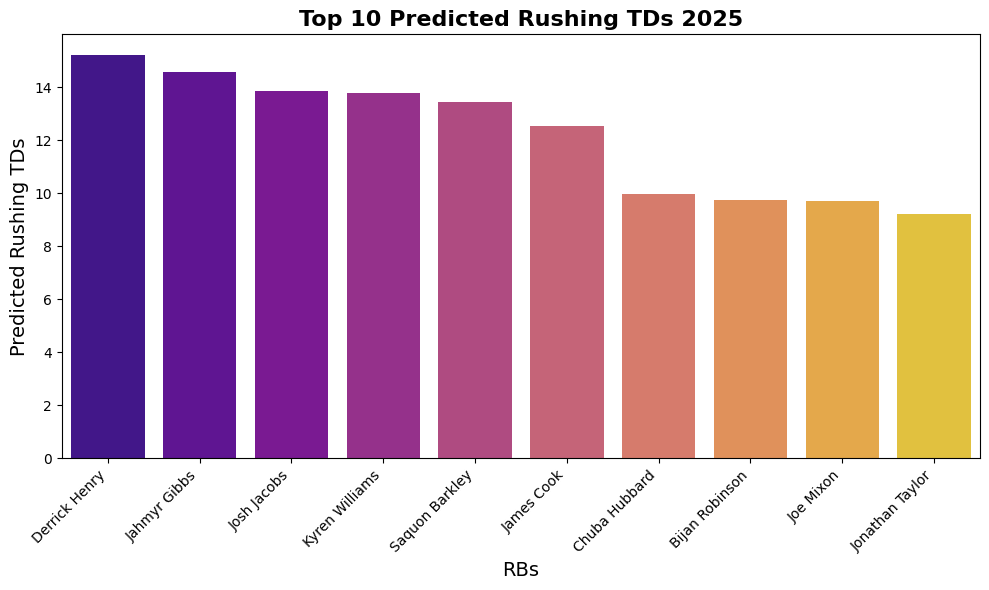

In [132]:
# Plotting the Predicted 2025 Rush TDs
plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='Predicted Rushing TDs 2025', data=top_10_tds, hue='Player', palette='plasma', legend=False)

# Adding labels
plt.title('Top 10 Predicted Rushing TDs 2025', fontsize=16, weight='bold')
plt.xlabel('RBs', fontsize=14)
plt.ylabel('Predicted Rushing TDs', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### The top 5 RBs with the highest predicted rushing TDs from this list:

1. Derrick Henry
2. Jahmyr Gibbs
3. Josh Jacobs
4. Kyren Williams
5. Saquon Barkley

#### Conclusions:

Derrick Henry remains the number one RB in rushing yards and rushing TDs, making him one of the most promising and consistent RBs in the NFL come 2025. However, Jonathan Taylor is now in 10th place when it comes to scoring TDs. Saquon moved down to 5th place on the list with Jahmyr Gibbs, Josh Jacobs (new to the list) and Kyren Williams taking 2nd through 4th, respectively.



# Forecasting total fantasy points for 2025

#### RB Fantasy Calculation:

*   1 point for every 10 rushing yards
*   6 points for every rushing touchdown


In [86]:
# Calculating fantasy pts for Rusing Yards and Rushing TDs

merged_df['Fantasy Rush Yards'] = merged_df['Predicted Rushing Yards 2025'] / 10
merged_df['Fantasy Rush TDs'] = merged_df['Predicted Rushing TDs 2025'] * 6

# Creating 'Total Fantasy Pts' column

merged_df['Total Ftsy Pts 2025'] = merged_df['Fantasy Rush Yards'] + merged_df['Fantasy Rush TDs']

In [87]:
# Predicting Top 10 RBs by total fantasy points
top_10_ftsy = merged_df.sort_values(by='Total Ftsy Pts 2025', ascending=False).head(10)

In [88]:
# Displaying Top 10 Fantasy RBs 2025
print(top_10_ftsy[['Player', 'Total Ftsy Pts 2025']].head(10))

             Player  Total Ftsy Pts 2025
15    Derrick Henry              279.687
42   Saquon Barkley              261.429
21     Jahmyr Gibbs              221.434
33   Kyren Williams              210.445
30      Josh Jacobs              203.273
29  Jonathan Taylor              183.118
24       James Cook              174.385
3    Bijan Robinson              174.178
8     Chuba Hubbard              163.558
23     James Conner              160.378


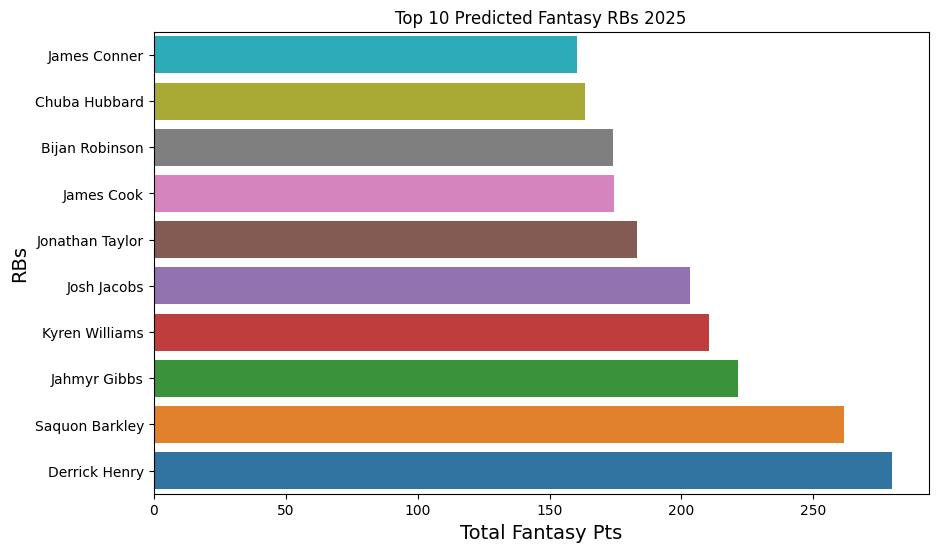

In [141]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Ftsy Pts 2025', y='Player', data=top_10_ftsy, hue='Player', legend=False)

# Adding labels
plt.xlabel('Total Fantasy Pts', fontsize=14)
plt.ylabel('RBs', fontsize=14)
plt.title('Top 10 Predicted Fantasy RBs 2025')
plt.gca().invert_yaxis()
plt.show()